A1

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

file_path = "/content/drive/MyDrive/Colab Notebooks/DWI_with_Labels.xlsx"
df = pd.read_excel(file_path)
data = df.to_numpy()

In [16]:
def normalize_features(row_vector):
    features = row_vector[:6724]
    min_val = np.min(features)
    max_val = np.max(features)

    if max_val - min_val == 0:
        normalized_features = features
    else:
        normalized_features = (features - min_val) / (max_val - min_val)

    return np.concatenate([normalized_features, [row_vector[6724]]])

A1) use one attribute of your dataset
(X_train) along with the target values (y_train) for training a linear regression model. Sample code
suggested below.

In [17]:

normalized_data = np.array([normalize_features(row) for row in data])

X = normalized_data[:, :6724]
y = normalized_data[:, 6724]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

X_train_single = X_train[:, [0]]
X_test_single = X_test[:, [0]]

reg = LinearRegression().fit(X_train_single, y_train)

y_train_pred = reg.predict(X_train_single)
y_test_pred = reg.predict(X_test_single)

A2) Calculate MSE, RMSE, MAPE and R2 scores for prediction made by the trained model in A1.  
Perform prediction on the test data and compare the metric values between train and test set.

In [18]:
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mape, r2

mse_train, rmse_train, mape_train, r2_train = evaluate_model(y_train, y_train_pred)
mse_test, rmse_test, mape_test, r2_test = evaluate_model(y_test, y_test_pred)

print("Train Set -> MSE:", mse_train, "RMSE:", rmse_train, "MAPE:", mape_train, "R2:", r2_train)
print("Test Set  -> MSE:", mse_test, "RMSE:", rmse_test, "MAPE:", mape_test, "R2:", r2_test)


Train Set -> MSE: 0.24685871163668957 RMSE: 0.4968487814583926 MAPE: 1111752801740156.0 R2: 0.0
Test Set  -> MSE: 0.24654750040564954 RMSE: 0.4965354976289707 MAPE: 1117303759714205.8 R2: -3.126480326631764e-05


A3) Repeat the exercises A1 and A2 with more than one attribute or all attributes.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

reg_all = LinearRegression().fit(X_train, y_train)

y_train_pred_all = reg_all.predict(X_train)
y_test_pred_all = reg_all.predict(X_test)

def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mape, r2

mse_train_all, rmse_train_all, mape_train_all, r2_train_all = evaluate_model(y_train, y_train_pred_all)

mse_test_all, rmse_test_all, mape_test_all, r2_test_all = evaluate_model(y_test, y_test_pred_all)

print("----- Linear Regression with ALL Features -----")
print("Train Set -> MSE:", mse_train_all, "RMSE:", rmse_train_all, "MAPE:", mape_train_all, "R2:", r2_train_all)
print("Test Set  -> MSE:", mse_test_all, "RMSE:", rmse_test_all, "MAPE:", mape_test_all, "R2:", r2_test_all)


----- Linear Regression with ALL Features -----
Train Set -> MSE: 1.7924497052114957e-29 RMSE: 4.23373322873737e-15 MAPE: 8.359882005899705 R2: 1.0
Test Set  -> MSE: 0.34615015730810417 RMSE: 0.58834527049013 MAPE: 1160254929509850.8 R2: -0.40403362051988934


A4) Perform k-means clustering on your data. Please remove / ignore the target variable for
performing clustering.

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans.fit(X_train)

cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

print("Cluster Labels (first 10):", cluster_labels[:10])
print("Cluster Centers shape:", cluster_centers.shape)

Cluster Labels (first 10): [0 1 1 0 0 1 1 0 1 0]
Cluster Centers shape: (2, 6724)


A5)  For the clustering done in A4, calculate the: (i) Silhouette Score, (ii) CH Score and (iii) DB Index.

In [21]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

sil_score = silhouette_score(X_train, kmeans.labels_)

ch_score = calinski_harabasz_score(X_train, kmeans.labels_)

db_score = davies_bouldin_score(X_train, kmeans.labels_)

print("Silhouette Score:", sil_score)
print("Calinski-Harabasz Score:", ch_score)
print("Davies-Bouldin Index:", db_score)

Silhouette Score: 0.23166811024789358
Calinski-Harabasz Score: 171.3562229477747
Davies-Bouldin Index: 1.8885344381092495


A6)  Perform k-means clustering for different values of k. Evaluate the above scores for each k value.
Make a plot of the values against the k value to determine the optimal cluster count.

k=2 --> Silhouette: 0.2317, CH: 171.3562, DB: 1.8885
k=3 --> Silhouette: 0.0985, CH: 120.5084, DB: 2.4318
k=4 --> Silhouette: 0.0854, CH: 87.9149, DB: 3.0503
k=5 --> Silhouette: 0.0806, CH: 71.0975, DB: 3.2548
k=6 --> Silhouette: 0.0729, CH: 60.4505, DB: 3.3645
k=7 --> Silhouette: 0.0442, CH: 53.1163, DB: 3.2827
k=8 --> Silhouette: 0.0506, CH: 47.0500, DB: 3.4981
k=9 --> Silhouette: 0.0502, CH: 42.3395, DB: 3.3675
k=10 --> Silhouette: 0.0294, CH: 38.7011, DB: 3.4890


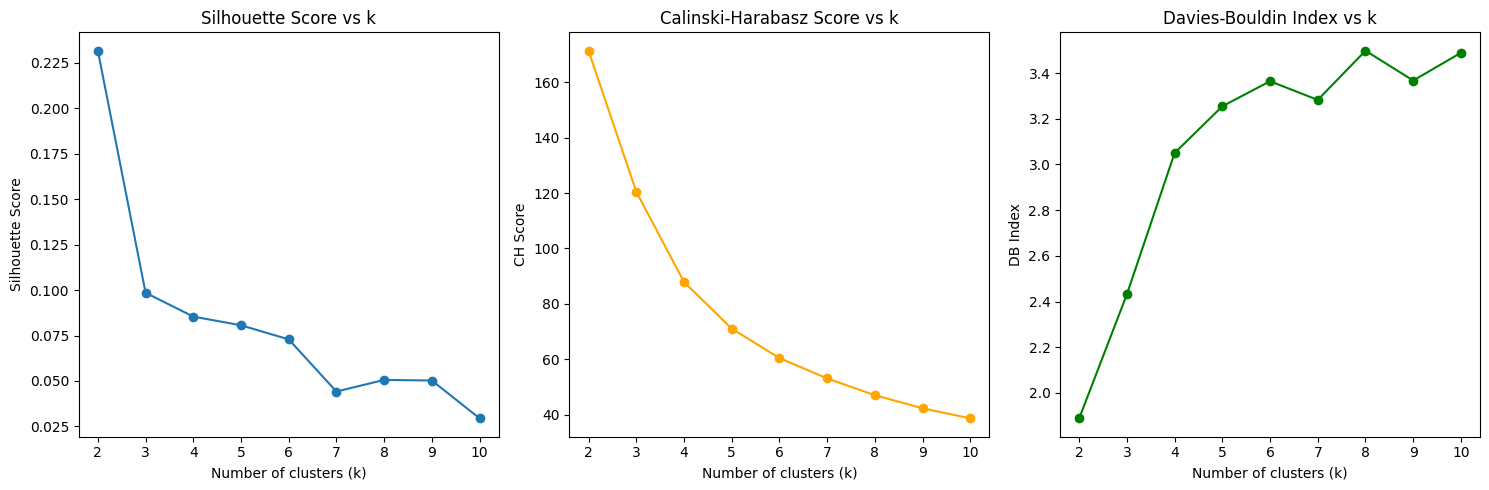

In [22]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

k_values = range(2, 11)
sil_scores = []
ch_scores = []
db_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_train)

    labels = kmeans.labels_

    sil = silhouette_score(X_train, labels)
    ch = calinski_harabasz_score(X_train, labels)
    db = davies_bouldin_score(X_train, labels)

    sil_scores.append(sil)
    ch_scores.append(ch)
    db_scores.append(db)

    print(f"k={k} --> Silhouette: {sil:.4f}, CH: {ch:.4f}, DB: {db:.4f}")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(k_values, sil_scores, marker='o')
plt.title('Silhouette Score vs k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 2)
plt.plot(k_values, ch_scores, marker='o', color='orange')
plt.title('Calinski-Harabasz Score vs k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('CH Score')

plt.subplot(1, 3, 3)
plt.plot(k_values, db_scores, marker='o', color='green')
plt.title('Davies-Bouldin Index vs k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('DB Index')

plt.tight_layout()
plt.show()


A7)  Using elbow plot, determine the optimal k value for k-means clustering.

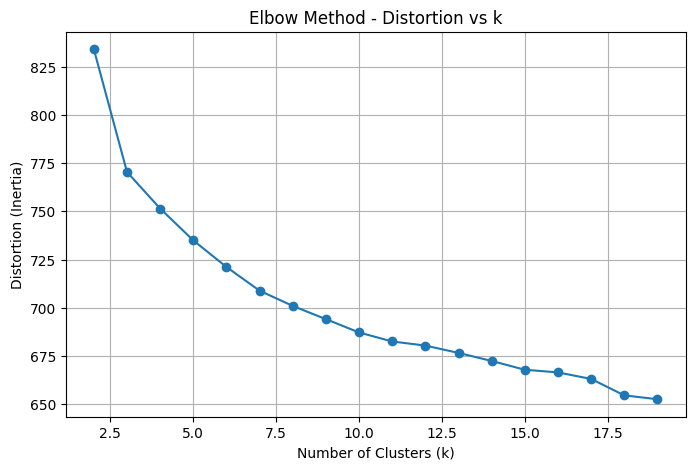

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

distortions = []
k_range = range(2, 20)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_train)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, distortions, marker='o')
plt.title('Elbow Method - Distortion vs k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.grid(True)
plt.show()
